In [ ]:
#LOGISTIC REGRESSION for HCV 

#Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hcvdat0.csv to hcvdat0.csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('hcvdat0.csv', index_col=0)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#Category is dependent variable 

#Age	Sex	ALB	ALP	ALT	AST	BIL	CHE	CHOL	CREA	GGT	PRO are independent variable

In [ ]:

# # Drop column of index using DataFrame.iloc[] and drop() methods.
# df2 = df.drop(df.iloc[:, 0:1],axis = 1)
# print(df2)                      
# df2.shape

In [ ]:
df.nunique()

Category      5
Age          49
Sex           2
ALB         189
ALP         414
ALT         341
AST         297
BIL         188
CHE         407
CHOL        313
CREA        117
GGT         358
PROT        198
dtype: int64

In [ ]:
#some null values are shown here

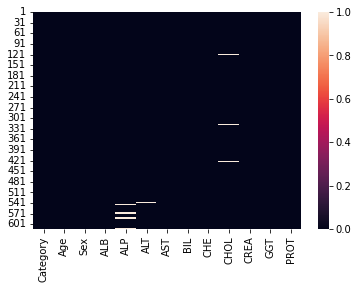

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.fillna(0, inplace = True)


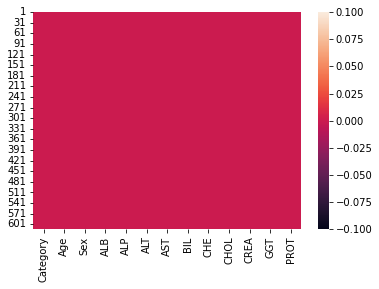

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
#According to heat map - ALP CHOL AND PROT has some null values hence should be replaced by any values

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
labelencoder = LabelEncoder()
new_df=df
new_df['Category']=labelencoder.fit_transform(df['Category'])
new_df['Sex']=labelencoder.fit_transform(df['Sex'])

In [ ]:
new_df.head(2)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


In [ ]:
x= new_df.iloc[:, 1:]
print(x)

     Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
1     32    1  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1   
2     32    1  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6   
3     32    1  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2   
4     32    1  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8   
5     32    1  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
611   62    0  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9   
612   64    0  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9   
613   64    0  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2   
614   46    0  33.0    0.0   39.0   62.0  20.0   3.56  4.20   52.0   50.0   
615   59    0  36.0    0.0  100.0   80.0  12.0   9.07  5.30   67.0   34.0   

     PROT  
1    69.0  
2    76.5  
3    79.3  
4    75.7  
5    68.7  
.. 

In [ ]:
y= new_df.iloc[:, 0]
print(y)

1      0
2      0
3      0
4      0
5      0
      ..
611    4
612    4
613    4
614    4
615    4
Name: Category, Length: 615, dtype: int64


In [ ]:
#Extracting Independent and dependent Variable  
#all rows from  1 column to last,  except column 0 that is Category 
#all rows from  0 column ie Category
x= new_df.iloc[:, 1:].values  
y= new_df.iloc[:, 0].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[135,   0,   0,   0,   0],
       [  2,   1,   0,   0,   1],
       [  1,   0,   0,   2,   1],
       [  1,   0,   0,   2,   1],
       [  0,   0,   0,   1,   6]])

In [ ]:
print('Accuracy of logistic regression classifier on test set: {}'.format(classifier.score(x_test, y_test)))

print('Accuracy of logistic regression classifier on test set: {}'.format(classifier.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.935064935064935
Accuracy of logistic regression classifier on test set: 0.935064935064935


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       135
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         4
           3       0.40      0.50      0.44         4
           4       0.67      0.86      0.75         7

    accuracy                           0.94       154
   macro avg       0.61      0.52      0.52       154
weighted avg       0.92      0.94      0.92       154



In [ ]:
tested_x = classifier.predict(x_test)

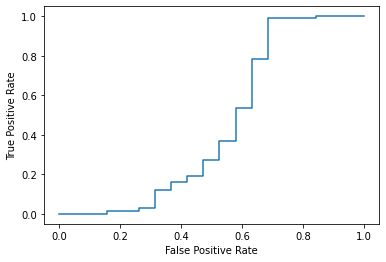

In [ ]:
from sklearn import metrics
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)

#create ROC curve
plt.plot(fpr,tpr )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision tree for HCV dataset


Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [ ]:
# importing the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.

In [ ]:
# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
df.drop(df.iloc[:, 0:1],axis = 1)
xdf=df
t = xdf.iloc[:, 1:].values
v = new_df.iloc[:, 0].values

print(v)

t_train, t_test, v_train, v_test= train_test_split(t, v, test_size= 0.25)


st_x= StandardScaler()    
t_train= st_x.fit_transform(t_train)    
t_test= st_x.fit_transform(t_test)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(t_train, v_train)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
v_pred_gini = clf_gini.predict(t_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(v_test, v_pred_gini)))

v_pred_train_gini = clf_gini.predict(t_train)

v_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(v_train, v_pred_train_gini)))


Model accuracy score with criterion gini index: 0.8831
Training-set accuracy score: 0.9523


[Text(0.5, 0.875, 'X[5] <= 0.629\ngini = 0.22\nsamples = 461\nvalue = [406, 5, 12, 16, 22]'),
 Text(0.25, 0.625, 'X[4] <= -0.685\ngini = 0.079\nsamples = 420\nvalue = [403, 2, 7, 5, 3]'),
 Text(0.125, 0.375, 'X[3] <= -0.514\ngini = 0.754\nsamples = 17\nvalue = [6, 1, 4, 3, 3]'),
 Text(0.0625, 0.125, 'gini = 0.594\nsamples = 8\nvalue = [0, 1, 4, 3, 0]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [6, 0, 0, 0, 3]'),
 Text(0.375, 0.375, 'X[3] <= -1.85\ngini = 0.029\nsamples = 403\nvalue = [397, 1, 3, 2, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]'),
 Text(0.4375, 0.125, 'gini = 0.02\nsamples = 401\nvalue = [397, 1, 3, 0, 0]'),
 Text(0.75, 0.625, 'X[7] <= -0.81\ngini = 0.688\nsamples = 41\nvalue = [3, 3, 5, 11, 19]'),
 Text(0.625, 0.375, 'X[6] <= 0.272\ngini = 0.374\nsamples = 23\nvalue = [1, 1, 2, 1, 18]'),
 Text(0.5625, 0.125, 'gini = 0.75\nsamples = 8\nvalue = [1, 1, 2, 1, 3]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 0,

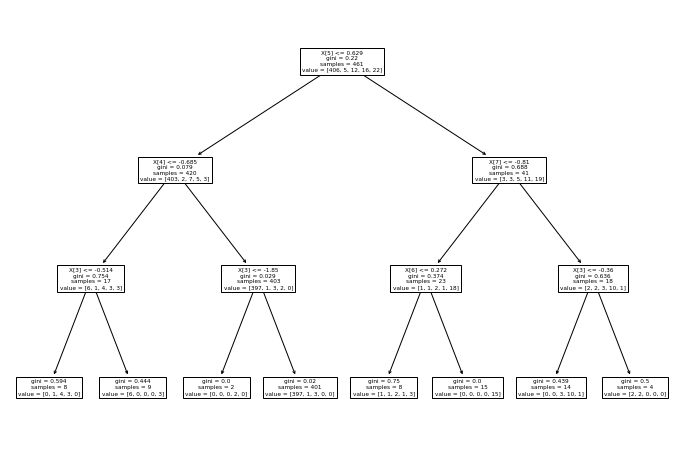

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(t_train, v_train)) 

Logistic regression for my data

In [ ]:
from google.colab import files
upload = files.upload()

Saving student-mat.xls to student-mat.xls


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/student-mat.csv', delimiter=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#Drop the columns with the non numerical values.
num_df=df
num_df.drop(df.iloc[1: , :],axis = 1)
print(num_df)   
# num_df =df1.drop(['Grid Ref: Easting', 'Grid Ref: Northing','Reference Number','Accident Date','Time (24hr)', '1st Road Class','Casualty Class', '1st Road Class & No','Vehicle Number','Local Authority'], axis=1)
num_df.columns



    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

cols = ['address','famsize','school', 'sex','Mjob','Fjob','schoolsup','famsup','paid','Pstatus','guardian','reason','activities','nursery','higher','internet','romantic']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
#x= num_df.iloc[:, 0:].values y= num_df.iloc[:, 0].values  

x= num_df.iloc[:, 1:32].values  
y= num_df.iloc[:, 0].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[89,  3],
       [ 4,  3]])

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        92
           1       0.50      0.43      0.46         7

    accuracy                           0.93        99
   macro avg       0.73      0.70      0.71        99
weighted avg       0.92      0.93      0.93        99



In [ ]:
tested_x = classifier.predict(x_test)

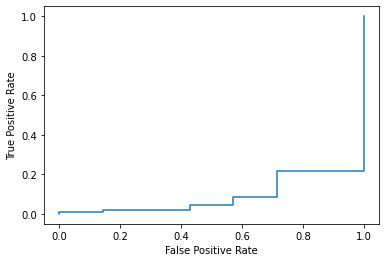

In [ ]:
from sklearn import metrics
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()